In [1]:
import numpy as np
import anndata as ad
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import umap.umap_ as umap
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

### HFC

In [8]:
corr = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/hfc/Matrix/corr_0_1.npy")
eigenvector = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/hfc/first_eigenvector_dzh.npy")
feature = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/hfc/feature.npy")

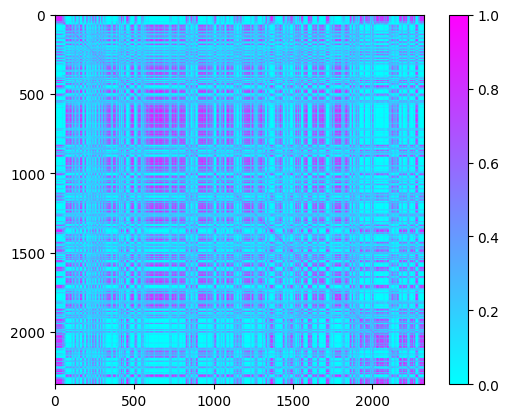

In [9]:
plt.imshow(corr, cmap=plt.cm.cool)#
plt.colorbar()
plt.savefig('./figure/hfc_heatmap.eps',dpi=300,format='eps')
plt.show()

8
0.39226305
0.6637851


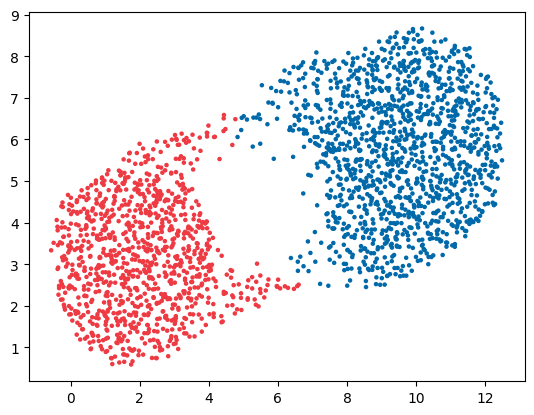

16
0.2793832
0.7077412


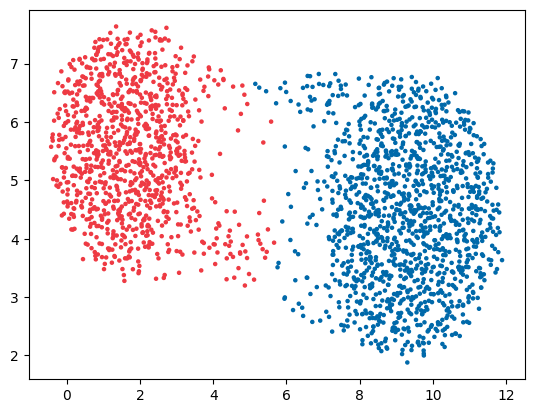

32
0.2137888
0.734104


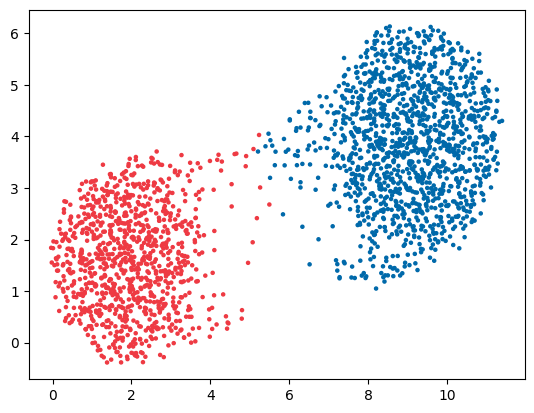

64
0.17345634
0.796228


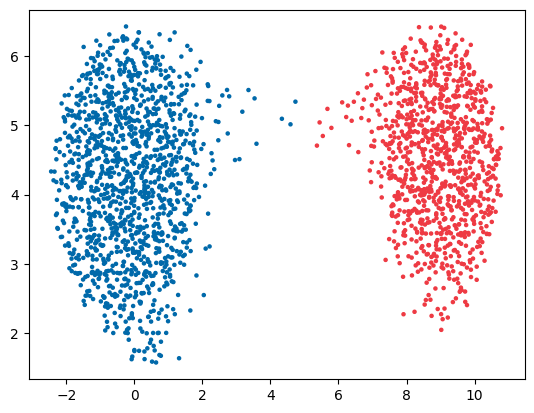

128
0.14066352
0.81453025


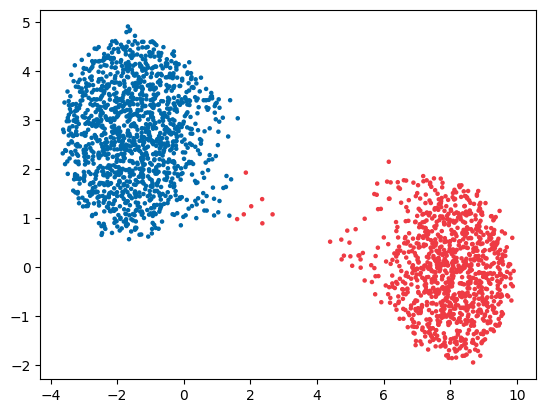

In [17]:
embedding_size_list = [8, 16, 32, 64, 128]
for embedding_size in embedding_size_list:
    embedding = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/hfc/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
    adata = ad.AnnData(embedding)
    sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
    sc.tl.leiden(adata,resolution=0.3)
    adata.obs['eigen'] = eigenvector
    sc.tl.umap(adata)
#     sc.pl.umap(adata, color='eigen', cmap='RdBu_r')
    print(embedding_size)
    print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
    print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
#     sc.pl.umap(adata, color='leiden')
    abclass = np.array(adata.obs['leiden'])
    color_list = []
    for i in range(len(adata.obs['leiden'])):
        if (adata.obs['leiden'][i]) == '0':
            color_list.append('#0069aa')
        else:
            color_list.append('#ee3a43')
    pos = np.array(adata.obsm['X_umap'])
    plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=5, marker="o")
    plt.savefig("/home/zihend1/scENCORE/Supplement/S1/figure/hfc_umap_es"+str(embedding_size)+".eps",dpi=300,format='eps')
    plt.show()

### BRG

In [18]:
corr = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/brg/Matrix/corr_0_1.npy")
eigenvector = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/brg/first_eigenvector_dzh.npy")
feature = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/brg/feature.npy")

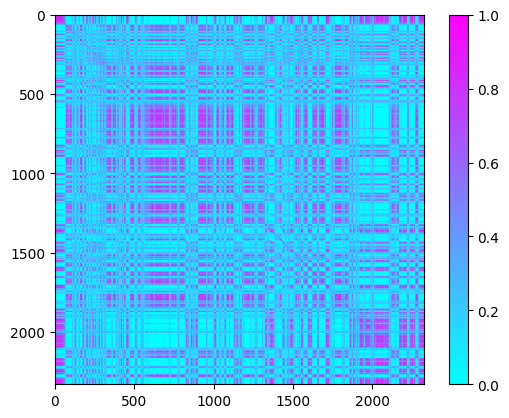

In [19]:
plt.imshow(corr, cmap=plt.cm.cool)#
plt.colorbar()
plt.savefig('./figure/brg_heatmap.eps',dpi=300,format='eps')
plt.show()

8
0.34960806
0.6358039


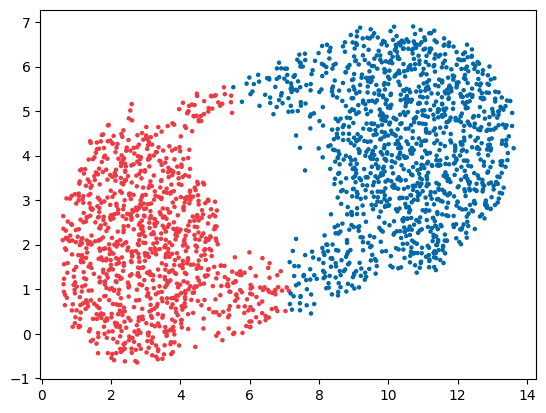

16
0.2444019
0.6587424


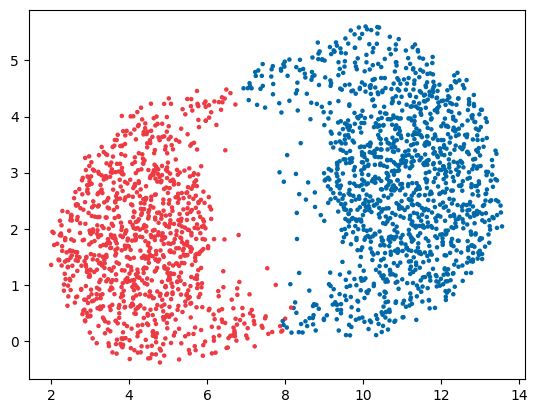

32
0.18268773
0.68785167


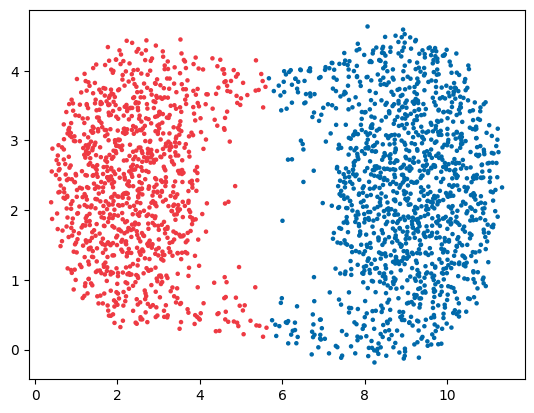

64
0.1458032
0.694576


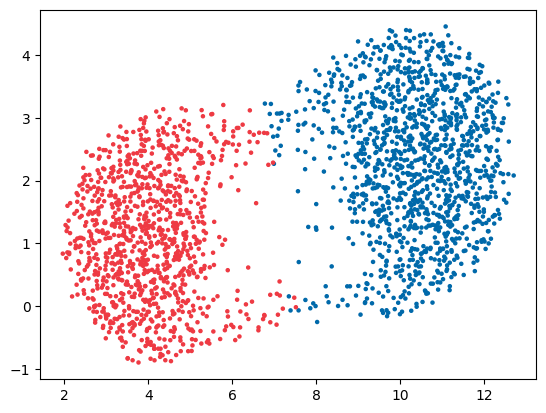

128
0.117679164
0.71448696


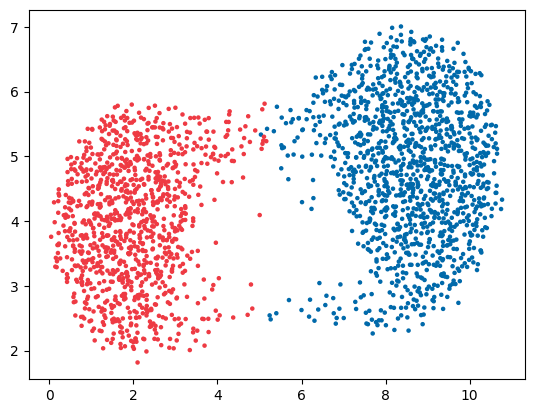

In [20]:
embedding_size_list = [8, 16, 32, 64, 128]
for embedding_size in embedding_size_list:
    embedding = np.load("/auto/grad_space/zihend1/scENCORE/Bulk-ATAC-seq/1000K/brg/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
    adata = ad.AnnData(embedding)
    sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
    sc.tl.leiden(adata,resolution=0.3)
    adata.obs['eigen'] = eigenvector
    sc.tl.umap(adata)
#     sc.pl.umap(adata, color='eigen', cmap='RdBu_r')
    print(embedding_size)
    print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
    print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
#     sc.pl.umap(adata, color='leiden')
    abclass = np.array(adata.obs['leiden'])
    color_list = []
    for i in range(len(adata.obs['leiden'])):
        if (adata.obs['leiden'][i]) == '0':
            color_list.append('#0069aa')
        else:
            color_list.append('#ee3a43')
    pos = np.array(adata.obsm['X_umap'])
    plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=5, marker="o")
    plt.savefig("/home/zihend1/scENCORE/Supplement/S1/figure/brg_umap_es"+str(embedding_size)+".eps",dpi=300,format='eps')
    plt.show()

In [15]:
len(np.where(abclass=='1')[0])

1043

In [32]:
color_list = []
for i in range(len(adata.obs['leiden'])):
    if (adata.obs['leiden'][i]) == '0':
        color_list.append('#6e896a')
    else:
        color_list.append('#ad5247')

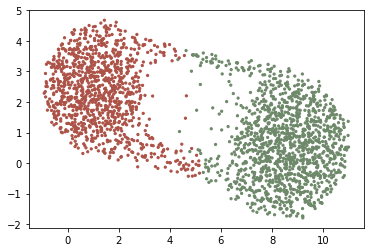

In [33]:
pos = np.array(adata.obsm['X_umap'])
plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=5, marker="o")
# plt.savefig('/home/zihend1/scENCORE/Supplement/hfc.eps',dpi=1000,format='eps')
plt.savefig('/home/zihend1/scENCORE/Supplement/brg.eps',dpi=1000,format='eps')
plt.show()

In [22]:
import pandas as pd

In [23]:
bin_df = pd.read_csv("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/gap.blacklist.hg38.1000000.4col.autosomal.bed", sep='\t', names=["chr","start","end","name"])
delete_bins = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/delete_bins.npy")
bin_df_new = bin_df.drop(delete_bins).reset_index(drop=True)

In [25]:
bin_df_new

,chr,start,end,name
0,chr1,1000000,2000000,chr1_2
1,chr1,2000000,3000000,chr1_3
2,chr1,3000000,4000000,chr1_4
3,chr1,4000000,5000000,chr1_5
4,chr1,5000000,6000000,chr1_6
...,...,...,...,...
2324,chr22,44000000,45000000,chr22_45
2325,chr22,45000000,46000000,chr22_46
2326,chr22,46000000,47000000,chr22_47
2327,chr22,47000000,48000000,chr22_48


In [32]:
chr_region_number = []
for i in range(1,23):
    print(i, len(bin_df_new[bin_df_new.chr=="chr"+str(i)]))
    chr_region_number.append(len(bin_df_new[bin_df_new.chr=="chr"+str(i)]))

1 218
2 204
3 130
4 172
5 137
6 150
7 139
8 124
9 97
10 126
11 116
12 115
13 93
14 67
15 65
16 76
17 72
18 65
19 45
20 57
21 32
22 29


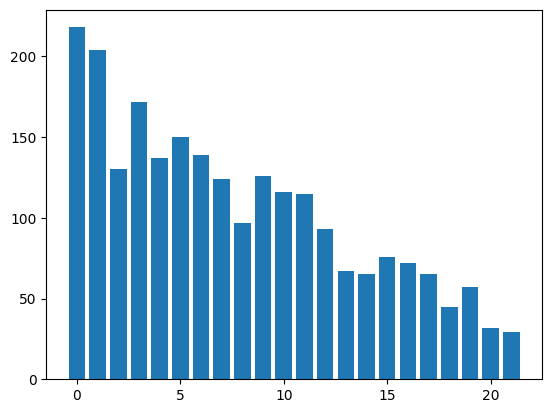

In [34]:
plt.bar(range(len(chr_region_number)), chr_region_number)
plt.savefig('/home/zihend1/scENCORE/Supplement/S1/figure/chr_region_number.eps',dpi=300,format='eps')
plt.show()